## Pheno-Ranker
<em>Advancing Semantic Similarity Analysis of Phenotypic Data Stored in GA4GH Standards and Beyond.</em>


# Installation

*Note:* We'll perform an installation directly from the [GitHub](https://github.com/CNAG-Biomedical-Informatics/pheno-ranker) source.

First we will download the repository by using `git clone`

In [ ]:
!git clone https://github.com/CNAG-Biomedical-Informatics/pheno-ranker.git


Cloning into 'pheno-ranker'...
remote: Enumerating objects: 1288, done.
remote: Counting objects: 100% (391/391), done.
remote: Compressing objects: 100% (237/237), done.
remote: Total 1288 (delta 172), reused 306 (delta 103), pack-reused 897
Receiving objects: 100% (1288/1288), 5.27 MiB | 8.40 MiB/s, done.
Resolving deltas: 100% (646/646), done.


Now we enter into `pheno-ranker` directory:

In [ ]:
%cd pheno-ranker/

/content/pheno-ranker


And we perform the installation of the needed dependencies.
Note that this task will take **a few minutes** to complete...

In [ ]:
!make -f makefile.install install

sudo apt-get install cpanminus libperl-dev
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  libalgorithm-c3-perl libany-uri-escape-perl libb-hooks-endofscope-perl
  libb-hooks-op-check-perl libclass-c3-perl libclass-c3-xs-perl
  libclass-method-modifiers-perl libclass-xsaccessor-perl libclone-perl
  libcpan-changes-perl libcpan-distnameinfo-perl libcpan-meta-check-perl
  libdata-optlist-perl libdata-perl-perl libdata-section-perl
  libdevel-callchecker-perl libdynaloader-functions-perl libencode-locale-perl
  libexporter-tiny-perl libfile-pushd-perl libfile-slurp-perl
  libgetopt-long-descriptive-perl libhtml-parser-perl libhtml-tagset-perl
  libhttp-date-perl libhttp-message-perl libidn12 libimport-into-perl
  libio-html-perl libio-stringy-perl liblist-moreutils-perl
  liblist-moreutils-xs-perl liblocal-lib-perl liblwp-mediatypes-perl
  libmodule-build-perl libmodule-cpanfile-perl li

The CLI is located at `bin/pheno-ranker`. Let's execute it to visualize the help:

In [ ]:
!bin/pheno-ranker -h

Usage:
    pheno-ranker -r <individuals.json> -t <patient.json> [-options]

         Arguments:                       
         * Cohort mode:
           -r|reference                   BFF/PXF file(s) (JSON|YAML array or object)

         * Patient mode:
           -t|target                      BFF/PXF file (JSON|YAML object or array of 1 object)

         Options:
           -age                           Include age-related variables [>no-age|age]
           -a|align                       Write alignment file(s). If no argument is given the files will be named [alignment.*]
           -append-prefixes               The prefixes to be added to the primary_key of individuals when #cohorts >= 2 [C]
           -config                        YAML config file to change default parameters [share/conf/config.yaml)
           -e|export                      Export miscellanea JSON files. If no argument is given the files will be named [export.*]
           -exclude-terms                 Exclu

# Command-line examples

Ok, we're going to run a few jobs. We'll be using the included test data.

## Cohort Mode

### Intra-Cohort analysis

Our input file is going to be a Beacon v2 Models `individuals` file (BFF) in `json` format.

Let's take a look to its content with [JSON Hero](https://jsonhero.io/new?url=https://raw.githubusercontent.com/cnag-biomedical-informatics/pheno-ranker/main/t/individuals.json).

In [ ]:
#@title
%%html
<Iframe src="https://jsonhero.io/new?url=https://raw.githubusercontent.com/cnag-biomedical-informatics/pheno-ranker/main/t/individuals.json", width='1600', height='500'>

Nice!

We are going to start by performing an intra-cohort analysis.

From now on. we'll be storing the files in the directory `/content`.

In [ ]:
!bin/pheno-ranker -r t/individuals.json -o /content/matrix.txt

Uhmm...no output on the screen, what happened?

Well, this is actually a sign that the program worked fine. No news is good news.

A new file was created at `/content/matrix.txt`.

*Note:* You can access the directory `/content` by clicking in the folder icon on the left side navigation menu.


Let's use the Linux command `head` see the first 10 lines of the file.

In [ ]:
!head /content/matrix.txt

	107:week_0_arm_1	107:week_2_arm_1	107:week_14_arm_1	125:week_0_arm_1	125:week_2_arm_1	125:week_14_arm_1	125:week_26_arm_1	125:week_52_arm_1	125:week_78_arm_1	215:week_0_arm_1	215:week_2_arm_1	215:week_14_arm_1	215:week_26_arm_1	215:week_52_arm_1	215:week_78_arm_1	257:week_0_arm_1	257:week_2_arm_1	257:week_14_arm_1	257:week_26_arm_1	275:week_0_arm_1	275:week_2_arm_1	275:week_14_arm_1	275:week_52_arm_1	305:week_0_arm_1	305:week_26_arm_1	305:week_52_arm_1	365:week_0_arm_1	365:week_2_arm_1	365:week_14_arm_1	365:week_26_arm_1	365:week_52_arm_1	527:week_0_arm_1	527:week_2_arm_1	527:week_14_arm_1	527:week_26_arm_1	527:week_52_arm_1
107:week_0_arm_1	0	24	23	6	23	23	24	43	40	16	27	29	27	49	32	29	45	45	50	14	25	30	51	18	26	45	20	25	26	30	45	24	24	23	32	43	
107:week_2_arm_1	24	0	3	22	3	3	2	23	18	30	7	9	7	29	10	47	25	25	28	30	5	10	31	32	4	25	34	5	6	8	25	42	2	3	10	23	
107:week_14_arm_1	23	3	0	21	2	2	3	22	19	29	6	8	6	28	11	46	24	24	29	29	4	9	30	31	5	24	33	4	5	9	24	41	3	2	11	22	
125:week_0_arm_1	6	2

The result is a bidimensional matrix of all the pairwise distances between the 36 individuals.

We'll resort to R for analysis.

First we need to do some magic to enable using R within Python:


In [ ]:
%load_ext rpy2.ipython

Now we install the R packages that we will be using:

In [ ]:
%%R
install.packages(c("pheatmap","ggrepel","dplyr", "stringr"))


(as ‘lib’ is unspecified)





























	‘/tmp/RtmpBfJvwt/downloaded_packages’



There you go, we can now perform the clustering with the library [pheatmap](https://www.rdocumentation.org/packages/pheatmap/versions/1.0.12/topics/pheatmap).

The result is a heatmap with all the Hamming distances between individuals. Note that we measure **dissimilarity**, that's why the diagonal is blue.

`BLUE == GOOD (lower distance)`

`RED  == BAD (higuer distance)`

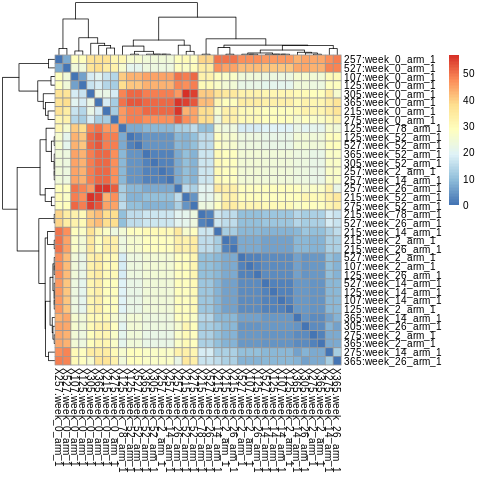

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

We are going to perform dimensionality reduction via [MDS](https://en.wikipedia.org/wiki/Multidimensional_scaling)

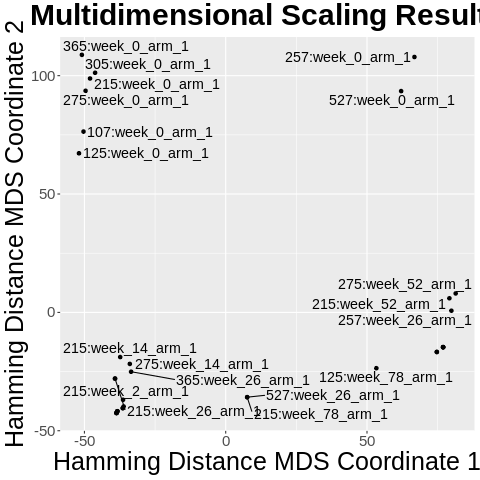

In [ ]:
# @title Plot { run: "auto" }
%%R

library(ggplot2)
library(ggrepel)

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/matrix.txt", header = TRUE, row.names = 1))

#calculate distance matrix
d <- dist(data)

#perform multidimensional scaling
fit <- cmdscale(d, eig=TRUE, k=2)

#extract (x, y) coordinates of multidimensional scaling
x <- fit$points[,1]
y <- fit$points[,2]

# Create example data frame
df <- data.frame(x, y, label=row.names(data))

# Save image
#png(filename = "mds.png", width = 1000, height = 1000,
#   units = "px", pointsize = 12, bg = "white", res = NA)

# Create scatter plot
ggplot(df, aes(x, y, label = label)) +
  geom_point() +
  geom_text_repel(size = 5, # Adjust the size of the text
                  box.padding = 0.2, # Adjust the padding around the text
                  max.overlaps = 10) + # Change the maximum number of overlaps
  labs(title = "Multidimensional Scaling Results",
       x = "Hamming Distance MDS Coordinate 1",
       y = "Hamming Distance MDS Coordinate 2") + # Add title and axis labels
  theme(
        plot.title = element_text(size = 30, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 25),
        axis.text = element_text(size = 15))

#dev.off()

### Inter-Cohort Analysis

Ok, now we are goint to perform inter-cohort analysis. The mechanism is identical to that of intra-cohort, just that you can add more than one cohort after the `-r` flag. We will be using `t/individuals.json` twice for demonstration purposes.

In [ ]:
!bin/pheno-ranker -r t/individuals.json t/individuals.json -o /content/inter_cohort_default_matrix.txt

Ok, let's perform the heatmap. You will see that by default `pheno-ranker` added `C1_` and `C2_` to each cohort.

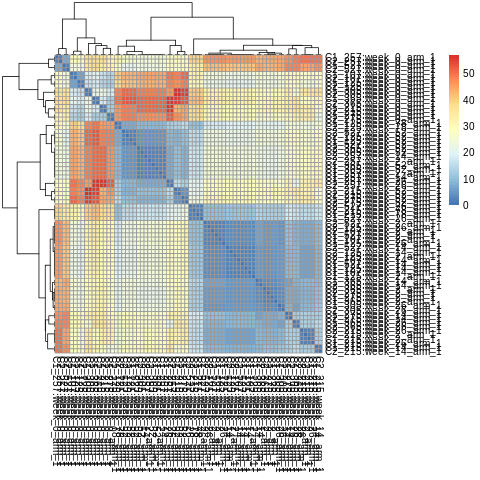

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_default_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

Great, it is possible to add your favourite prefix, you just have to use `--append-prefixes`, like in the example below:

In [ ]:
!bin/pheno-ranker -r t/individuals.json t/individuals.json --append-prefixes 3TR GPAP  -o /content/inter_cohort_matrix.txt

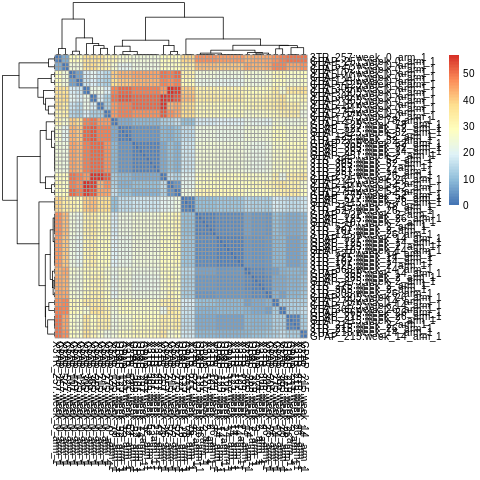

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)

Great, let's perform MDS again, this time we'll add colors to the labels:

Attaching package: ‘dplyr’



    filter, lag



    intersect, setdiff, setequal, union




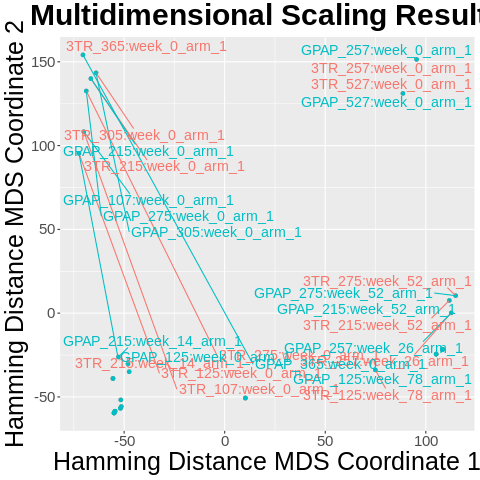

In [ ]:
# @title Plot { run: "auto" }
%%R

library(ggplot2)
library(ggrepel)
library(dplyr)
library(stringr)

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/inter_cohort_matrix.txt", header = TRUE, row.names = 1))

#calculate distance matrix
d <- dist(data)

#perform multidimensional scaling
fit <- cmdscale(d, eig=TRUE, k=2)

#extract (x, y) coordinates of multidimensional scaling
x <- fit$points[,1]
y <- fit$points[,2]

# Create example data frame
df <- data.frame(x, y, label=row.names(data))

# Add a new variable to the data frame based on the label prefixes
df <- df %>% mutate(label_prefix = str_extract(label, "^[^_]*_"))

# Save image
#png(filename = "mds.png", width = 1000, height = 1000,
#    units = "px", pointsize = 12, bg = "white", res = NA)

# Create scatter plot
ggplot(df, aes(x, y, label = label, color = label_prefix)) +
  geom_point() +
  geom_text_repel(size = 5, # Adjust the size of the text
                  box.padding = 0.2, # Adjust the padding around the text
                  max.overlaps = 10) + # Change the maximum number of overlaps
  labs(title = "Multidimensional Scaling Results",
       x = "Hamming Distance MDS Coordinate 1",
       y = "Hamming Distance MDS Coordinate 2") + # Add title and axis labels
  theme(
        plot.title = element_text(size = 30, face = "bold", hjust = 0.5),
        axis.title = element_text(size = 25),
        axis.text = element_text(size = 15),
        legend.position = "none") # remove legend

#dev.off()

## Patient Mode

Now we are going to compare a given patient to a cohort and rank the results.

In [ ]:
!bin/pheno-ranker -r t/individuals.json -t t/patient.json -max-out 10 -o /content/rank.txt

RANK	REFERENCE(ID)	TARGET(ID)	FORMAT	LENGTH	WEIGHTED	HAMMING-DISTANCE	DISTANCE-Z-SCORE	DISTANCE-P-VALUE	DISTANCE-Z-SCORE(RAND)	JACCARD-INDEX	JACCARD-Z-SCORE	JACCARD-P-VALUE
1	107:week_0_arm_1	107:week_0_arm_1	BFF	    77	False	   0	 -2.419	   0.0077787	 -8.7750	  1.000	  2.949	   0.0256500
2	125:week_0_arm_1	107:week_0_arm_1	BFF	    79	False	   6	 -1.924	   0.0271576	 -7.5381	  0.924	  2.269	   0.1022693
3	275:week_0_arm_1	107:week_0_arm_1	BFF	    86	False	  14	 -1.265	   0.1030165	 -6.2543	  0.837	  1.491	   0.3117348
4	215:week_0_arm_1	107:week_0_arm_1	BFF	    88	False	  16	 -1.100	   0.1357515	 -5.9696	  0.818	  1.321	   0.3742868
5	305:week_0_arm_1	107:week_0_arm_1	BFF	    89	False	  18	 -0.935	   0.1749800	 -5.6180	  0.798	  1.138	   0.4452980
6	365:week_0_arm_1	107:week_0_arm_1	BFF	    87	False	  20	 -0.770	   0.2207314	 -5.0389	  0.770	  0.890	   0.5437899
7	125:week_2_arm_1	107:week_0_arm_1	BFF	    78	False	  23	 -0.522	   0.3007259	 -3.6233	  0.705	  0.308	   0.7555423
8	527:we

As you have seen the output goes to the console, but it also goes to a file named `/content/rank.txt`. You can change the name of the file with the flag `-o`.

Let's load the data into Python's `pandas` and display it as HTML. Note that you can click below the table to perform miscellanea data analytics.

In [ ]:
# @title Table { run: "auto" }
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Import csv
df = pd.read_csv('/content/rank.txt', delimiter='\t')
df.head(10)

,RANK,REFERENCE(ID),TARGET(ID),FORMAT,LENGTH,WEIGHTED,HAMMING-DISTANCE,DISTANCE-Z-SCORE,DISTANCE-P-VALUE,DISTANCE-Z-SCORE(RAND),JACCARD-INDEX,JACCARD-Z-SCORE,JACCARD-P-VALUE
0,1,107:week_0_arm_1,107:week_0_arm_1,BFF,77,False,0,-2.419,0.007779,-8.7750,1.000,2.949,0.025650
1,2,125:week_0_arm_1,107:week_0_arm_1,BFF,79,False,6,-1.924,0.027158,-7.5381,0.924,2.269,0.102269
2,3,275:week_0_arm_1,107:week_0_arm_1,BFF,86,False,14,-1.265,0.103016,-6.2543,0.837,1.491,0.311735
3,4,215:week_0_arm_1,107:week_0_arm_1,BFF,88,False,16,-1.100,0.135751,-5.9696,0.818,1.321,0.374287
4,5,305:week_0_arm_1,107:week_0_arm_1,BFF,89,False,18,-0.935,0.174980,-5.6180,0.798,1.138,0.445298
5,6,365:week_0_arm_1,107:week_0_arm_1,BFF,87,False,20,-0.770,0.220731,-5.0389,0.770,0.890,0.543790
6,7,125:week_2_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
7,8,527:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
8,9,107:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542
9,10,125:week_14_arm_1,107:week_0_arm_1,BFF,78,False,23,-0.522,0.300726,-3.6233,0.705,0.308,0.755542


We'll run again the whole thing, but this time we'll be using Python's interpreter to enable interactive changes in values.

The code will get executed **automatically** anytime you change a value and the table will be re-rendered.

In [ ]:
#@title  { run: "auto" }
#@title  { run: "auto", vertical-output: true }
import os
import pandas as pd
from google.colab import data_table
data_table.enable_dataframe_formatter()

# Extarnal variables
exclude_terms = 'sex' #@param ["ethnicity", "exposures", "info", "interventionsOrProcedures", "measures", "phenotypicFeatures", "sex"] {allow-input: true}
max_out = 5 #@param {type:"slider", min:1, max:36, step:1}
sort_by = "hamming" # @param ["hamming", "jaccard"]

# Creating a dcitionary for args
arg = {
    '--exclude-terms': exclude_terms,
    '--max-out': max_out,
    '--sort-by': sort_by
}

# Create CLI string
string = ' '.join([f'{key} {value}' for key, value in arg.items()])
cmd = 'bin/pheno-ranker -r t/individuals.json -t t/patient.json -o /content/form_rank.txt ' + string
print(cmd)

# Run Convert-Pheno
os.system(cmd)

# Import csv
df = pd.read_csv('/content/form_rank.txt', delimiter='\t')
df

bin/pheno-ranker -r t/individuals.json -t t/patient.json -o /content/form_rank.txt --exclude-terms sex --max-out 5 --sort-by hamming


,RANK,REFERENCE(ID),TARGET(ID),FORMAT,LENGTH,WEIGHTED,HAMMING-DISTANCE,DISTANCE-Z-SCORE,DISTANCE-P-VALUE,DISTANCE-Z-SCORE(RAND),JACCARD-INDEX,JACCARD-Z-SCORE,JACCARD-P-VALUE
0,1,107:week_0_arm_1,107:week_0_arm_1,BFF,76,False,0,-2.389,0.008454,-8.7178,1.000,2.899,0.028780
1,2,125:week_0_arm_1,107:week_0_arm_1,BFF,78,False,6,-1.885,0.029725,-7.4730,0.923,2.212,0.112720
2,3,275:week_0_arm_1,107:week_0_arm_1,BFF,84,False,12,-1.381,0.083643,-6.5465,0.857,1.623,0.266490
3,4,215:week_0_arm_1,107:week_0_arm_1,BFF,87,False,16,-1.045,0.147997,-5.8966,0.816,1.257,0.398621
4,5,305:week_0_arm_1,107:week_0_arm_1,BFF,87,False,16,-1.045,0.147997,-5.8966,0.816,1.257,0.398621


### Extracting a patient from the cohort

To extract specific patient(s), simply use the syntax below. This will perform a _dry-run_ and retrieve the selected individuals from the cohort.

In [ ]:
!bin/pheno-ranker -r t/individuals.json --patients-of-interest 125:week_0_arm_1 275:week_0_arm_1 --poi-out-dir /content

# Uploading files

It's possible to run jobs using your own files. A few notes:

* The files will be stored in **your instance** of this document. We (developers) don't have access to them.

* Uploaded files will get **deleted** when this runtime is recycled.

* `Pheno-Ranker` does not send remote information to our servers and does not store user's information.

* The security is dictated by your Google account / drive.

The files can be uploaded by clicking in the upload button on the left tab of this screen. Files will be uploaded to `/content`.

Once the file is uploaded, you can execute `pheno-ranker` command-line as we did above.

Great! I hope this quick tour was useful.

Now it's time to try it out yourself!

Bye!!

Manu

# Addendum: Using Pheno-Ranker with CSV

You can run Pheno-Ranker using a CSV file. To do this, you must first convert the CSV to JSON using the provided utility `utils/csv2pheno_ranker/csv2pheno-ranker`.

Let's utilize the sample data included at /content/sample_data/california_housing_train.csv

**Note that this dataset is mostly quantitative data and Pheno-Ranker works better with qualitative one.**

First, we will convert the data to JSON, but we will use only 500 rows to make it manageable for R.

In [ ]:
!head -501 /content/sample_data/california_housing_train.csv > /content/sample_data/california_housing_train.500.csv
!utils/csv2pheno_ranker/csv2pheno-ranker -i /content/sample_data/california_housing_train.500.csv

This created two new files:

1.  /content/sample_data/california_housing_train.500.json
2. /content/sample_data/california_housing_train_config.500.yaml

Great, but let's create a new primary key with an unique id

In [ ]:
!utils/csv2pheno_ranker/csv2pheno-ranker -i /content/sample_data/california_housing_train.500.csv --set-primary-key --primary-key id

OK, let's run Pheno-Ranker in cohort mode including some variables:

In [ ]:
!bin/pheno-ranker -r /content/sample_data/california_housing_train.500.json \
                  --config /content/sample_data/california_housing_train_config.yaml \
                  --include-terms id housing_median_age median_house_value \
                  -o /content/california_housing_train_matrix.txt

Let's perform a clustering of that:

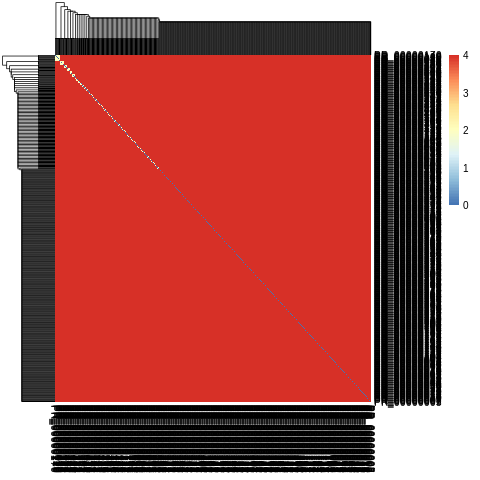

In [ ]:
# @title Plot { run: "auto" }
%%R

# Load library
library("pheatmap")

# Read in the input file as a matrix
data <- as.matrix(read.table("/content/california_housing_train_matrix.txt", header = TRUE, row.names = 1))

# Create the heatmap with row and column labels
pheatmap(data)